In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [ ]:
# Cette cellule fonctionne uniquement sur Google Collab, le dataset doit être importé à la main sur Jupyter
!wget https://perso.esiee.fr/~gueurett/Time_Series/Gold_Prices.csv

In [ ]:
# Extraction de la data, remplissage des Nan par des valeurs proches, et instauration de la colonne Date en tant qu'index
data = pd.read_csv('Gold_Prices.csv', delimiter=',')
data = data.fillna(method="ffill").set_index('Date')
data.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0
2000-09-07,274.000000,274.000000,274.000000,274.000000,274.000000,125.0
2000-09-08,273.299988,273.299988,273.299988,273.299988,273.299988,0.0
2000-09-11,273.100006,273.100006,273.100006,273.100006,273.100006,0.0


In [ ]:
# Normalisation de la data et transformation en Numpy array
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
print(data_scaled.shape)

test_size = 0.2
train_set = data_scaled[:int(data_scaled.shape[0]*(1-test_size)), :]
test_set =  data_scaled[int(data_scaled.shape[0]*(1-test_size)):, :]

print("train_set.shape: ", train_set.shape)
print("test_set.shape:  ", test_set.shape)

(5628, 6)
train_set.shape:  (4502, 6)
test_set.shape:   (1126, 6)


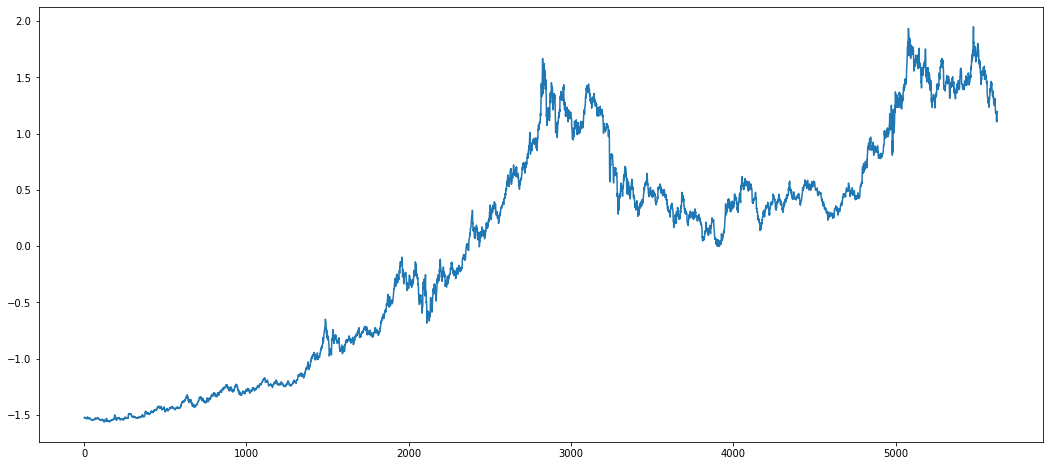

In [ ]:
# Notre variable a prédire est 'Open', voici son évolution au cours du temps.
plt.figure(figsize=(18,8))
plt.plot(data_scaled[:,0]);

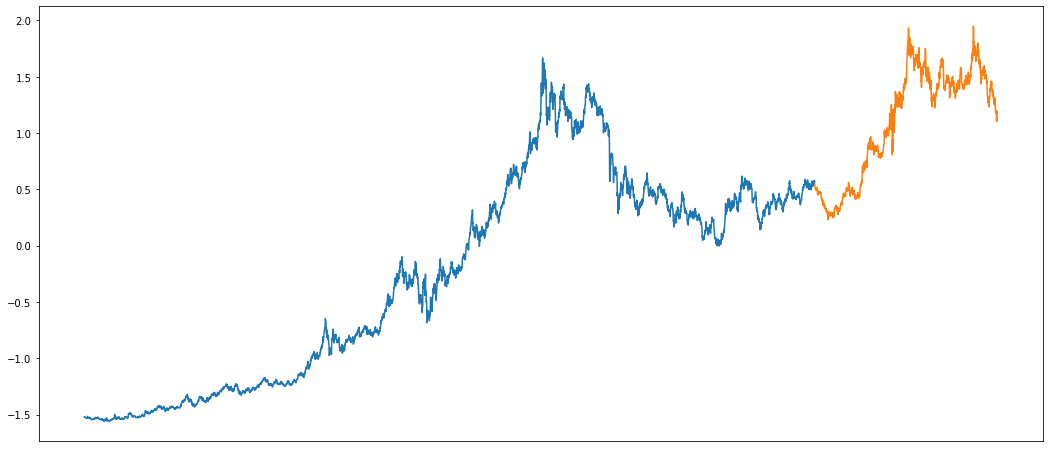

In [ ]:
# Séparation des sets de train et de test
# L'éxécution ici peut être longue à cause de l'affichage de toutes les dates.
plt.figure(figsize=(18,8))
plt.plot(data[:train_set.shape[0]].index, train_set[:,0]);
plt.plot(data[train_set.shape[0]:].index, test_set[:,0]);
plt.xticks([])
plt.show()

In [ ]:
# Variable a but de debugging
print_ = False

# Nous allons maintenant modifier notre dataset pour obtenir un format nous convenant et convenant aux couche LSTM
n_hori  = 50
n_pred  = 1


# Occupons nous du set d'entrainement
X_train = np.zeros(shape=(train_set.shape[0]-n_hori, n_hori+n_pred, train_set.shape[1]))

# Nous allons maintenant remplir le dataset d'entrainement
for index in range(X_train.shape[0]):
  for future_step in range(n_hori):
    if print_:
      print("---------------------")
      print("index:", index)
      print("future_step:", future_step)
      print("avant modif:")
      print(" array:", X_train[index, future_step, :])
    X_train[index, future_step, :] = train_set[index+future_step, :]
    if print_:
      print("après modif:")
      print(" array:", X_train[index, future_step, :])

for index in range(X_train.shape[0]):
  X_train[index, -n_pred:, :] = train_set[index+n_hori]

y_train = X_train[:, -n_pred:, :]
X_train = X_train[:, :-n_pred, :]

print("------------------------------")
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)


# Passons au set de test maintenant, la procédure est exactement la même
X_test = np.zeros(shape=(test_set.shape[0]-n_hori, n_hori+n_pred, test_set.shape[1]))

# Nous allons maintenant remplir le dataset d'entrainement
for index in range(X_test.shape[0]):
  for future_step in range(n_hori):
    if print_:
      print("---------------------")
      print("index:", index)
      print("future_step:", future_step)
      print("avant modif:")
      print(" array:", X_test[index, future_step, :])
    X_test[index, future_step, :] = test_set[index+future_step, :]
    if print_:
      print("après modif:")
      print(" array:", X_test[index, future_step, :])

for index in range(X_test.shape[0]):
  X_test[index, -n_pred:, :] = test_set[index+n_hori]

y_test = X_test[:, -n_pred:, :]
X_test = X_test[:, :-n_pred, :]

print("------------------------------")
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)
print("------------------------------")

------------------------------
X_train.shape: (4452, 50, 6)
y_train.shape: (4452, 1, 6)
------------------------------
X_test.shape:  (1076, 50, 6)
y_test.shape:  (1076, 1, 6)
------------------------------
